In [ ]:
import geopandas as gpd
from shapely.geometry import box
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


Data Cleaning


In [ ]:
Dyke=gpd.read_file('/content/dyke_line_25k_ngdr.shp')

In [ ]:
Dyke.shape

(603, 17)

In [ ]:
Dyke.isnull().sum()

,0
gid,0
objectid,0
input_cent,0
edition_no,0
toposheet_,0
dyke_type,0
lithology,26
stratigrap,0
supergroup,603
group_name,357


In [ ]:
Dyke.head()

,gid,objectid,input_cent,edition_no,toposheet_,dyke_type,lithology,stratigrap,supergroup,group_name,sub_group,formation,member,accession_,remarks,shape_leng,geometry
0,194,194,SR,1,57B07,Basic intrusives,Gabbro / dolorite dyke,Palaeoproterozoic,None,None,None,Basic intrusives,None,None,None,971.723889,"LINESTRING (76.47371 14.33998, 76.4723 14.3409..."
1,188,188,SR,1,57B04,Acid intrusives,Quartz vein,Palaeoproterozoic,None,None,None,Acid intrusives,None,None,None,2250.014098,"LINESTRING (76.15725 14.19706, 76.15424 14.200..."
2,189,189,SR,1,57B04,Acid intrusives,Quartz vein,Palaeoproterozoic,None,None,None,Acid intrusives,None,None,None,293.427454,"LINESTRING (76.24175 14.02089, 76.24291 14.02328)"
3,190,190,SR,1,57B06,Acid intrusives,Quartz vein,Palaeoproterozoic,None,None,None,Basic Intrusives,None,None,None,1612.061824,"LINESTRING (76.33877 14.59239, 76.33729 14.592..."
4,191,191,SR,1,57B06,Acid intrusives,Quartz vein,Palaeoproterozoic,None,None,None,Basic Intrusives,None,None,None,709.174100,"LINESTRING (76.32487 14.59579, 76.3258 14.5964..."


In [ ]:
Dyke.columns

Index(['gid', 'objectid', 'input_cent', 'edition_no', 'toposheet_',
       'dyke_type', 'lithology', 'stratigrap', 'supergroup', 'group_name',
       'sub_group', 'formation', 'member', 'accession_', 'remarks',
       'shape_leng', 'geometry'],
      dtype='object')

In [ ]:
Dyke=Dyke.drop(columns=[ 'supergroup', 'group_name',
       'sub_group','formation', 'member', 'accession_', 'remarks'
     ])

In [ ]:
Dyke=Dyke.dropna(subset=['lithology'])

In [ ]:
Dyke.shape

(577, 10)

In [ ]:
Dyke.to_file("Dyke.geojson", driver="GeoJSON")

In [ ]:
Dyke.duplicated().sum()


np.int64(0)

In [ ]:
fault=gpd.read_file('/content/fault_25k_ngdr_20250224140917945.shp')

In [ ]:
fault.shape

(16, 17)

In [ ]:
fault.columns

Index(['gid', 'input_cent', 'edition_no', 'toposheet_', 'fault_type',
       'fault_name', 'kinematics', 'strike', 'dip', 'displaceme', 'downthrow_',
       'neotech_ac', 'age_activa', 'accession_', 'remarks', 'shape_leng',
       'geometry'],
      dtype='object')

In [ ]:
fault.isnull().sum()

,0
gid,0
input_cent,0
edition_no,0
toposheet_,0
fault_type,0
fault_name,16
kinematics,16
strike,16
dip,16
displaceme,16


In [ ]:
fault=fault.drop(columns=[
       'fault_name', 'kinematics', 'strike', 'dip', 'displaceme', 'downthrow_',
       'neotech_ac', 'age_activa', 'accession_', 'remarks'])

In [ ]:
fault.shape

(16, 7)

In [ ]:
fault.to_file("fault.geojson", driver="GeoJSON")

In [ ]:
lithology=gpd.read_file('/content/lithology_25k_ngdr.shp')

In [ ]:
lithology.shape

(3599, 25)

In [ ]:
lithology.head()

,gid,input_cent,edition_no,toposheet_,geometry_i,stratigrap,supergroup,group_name,sub_group,formation,...,g_age_syst,g_material,texture,major_mine,accessory_,accession_,remarks,shape_leng,shape_area,geometry
0,4792,SR,1,57B04,None,Archaean,None,Sargur,None,Ghattihosahalli,...,None,None,None,hornblende and plagioclase,"sphene, epidote and zircon",None,None,29947.381248,2.139712e+06,"POLYGON ((76.19955 14.07173, 76.19952 14.07169..."
1,11224,SR,1,57F04,None,Palaeoproterozoic,None,None,None,Acid intrusives,...,None,None,None,None,None,None,None,536.449944,1.561984e+04,"POLYGON ((77.12362 14.08862, 77.12293 14.08829..."
2,8053,SR,1,57B08,None,Archaean,Dharwar,Chitradurga,None,Hiriyur,...,None,None,None,CALCITE,PYRITE,None,None,446.293357,1.396032e+02,"POLYGON ((76.40319 14.00003, 76.4032 14.00002,..."
3,6462,SR,1,57B08,None,Archaean,Dharwar,Chitradurga,None,Ingaldhal,...,None,None,None,"plagioclase, fibrous chlorite",PYRITE,None,None,866.026953,1.542011e+04,"POLYGON ((76.39095 14.09955, 76.39414 14.10087..."
4,4505,SR,1,57A13,None,Archaean,Dharwar,Hutti-Muski,None,Buddni,...,None,None,None,None,None,None,None,2563.997302,7.698388e+01,"MULTIPOLYGON (((76.83333 15.75, 76.83443 15.75..."


In [ ]:
lithology.tail()

,gid,input_cent,edition_no,toposheet_,geometry_i,stratigrap,supergroup,group_name,sub_group,formation,...,g_age_syst,g_material,texture,major_mine,accessory_,accession_,remarks,shape_leng,shape_area,geometry
3594,25419,SR,1,57B03,None,Palaeoproterozoic,None,None,None,Basic intrusives,...,None,None,None,None,None,None,None,2117.946523,2.334294e+04,"POLYGON ((76.05109 14.38188, 76.05095 14.38187..."
3595,25420,SR,1,57B03,None,Archaean,Dharwar,Bababudan,None,Kibbanahalli,...,None,None,Granular texture,"Plagioclase, actinolite and hornblende","Epidote, sphene and minor opaque",None,None,95.448117,1.525237e+02,"POLYGON ((76.1498 14.25003, 76.14978 14.25, 76..."
3596,25421,SR,1,57B03,None,Archaean,Dharwar,Bababudan,None,Kibbanahalli,...,None,None,Granular texture,"Plagioclase, actinolite and hornblende","Epidote, sphene and minor opaque",None,None,83.956402,8.748828e+01,"POLYGON ((76.1494 14.25, 76.14978 14.25, 76.14..."
3597,25422,SR,1,57F03,None,Archaean - Palaeoproterozoic,None,None,None,Closepet Granite,...,None,None,"Inequigranular, Hypidiomorphic, Perthite","K-feldspar, Quartz, Plagioclase","Mica, Amphibole, Epidote, Magnetite, Sphene",None,None,9875.221543,4.151216e+06,"POLYGON ((77.19076 14.37508, 77.18736 14.37508..."
3598,25424,SR,1,57F11,None,Archaean - Palaeoproterozoic,Peninsular Gneissic Complex,Peninsular Gneissic Complex II,None,None,...,None,None,<Null>,"Plagioclase, orthoclase, microcline, orthoclas...","myrmakite epidote, sphene, zircon, apatite, op...",None,None,28.150104,1.627229e+00,"POLYGON ((77.56663 14.25, 77.56663 14.25, 77.5..."


In [ ]:
lithology.columns

Index(['gid', 'input_cent', 'edition_no', 'toposheet_', 'geometry_i',
       'stratigrap', 'supergroup', 'group_name', 'sub_group', 'formation',
       'member', 'lithologic', 'standard_l', 'geochronol', 'g_age_erro',
       'g_age_syst', 'g_material', 'texture', 'major_mine', 'accessory_',
       'accession_', 'remarks', 'shape_leng', 'shape_area', 'geometry'],
      dtype='object')

In [ ]:
lithology.isnull().sum()

,0
gid,0
input_cent,0
edition_no,0
toposheet_,0
geometry_i,3599
stratigrap,4
supergroup,875
group_name,704
sub_group,3599
formation,1061


In [ ]:
lithology=lithology.drop(columns=['geometry_i','supergroup', 'group_name', 'sub_group',
       'member','geochronol', 'g_age_erro',
       'g_age_syst', 'g_material',
       'accession_', 'remarks'])

In [ ]:
lithology=lithology.dropna(subset=['texture','major_mine','accessory_','stratigrap'])

In [ ]:
lithology.shape

(2155, 14)

In [ ]:
lithology.head()

,gid,input_cent,edition_no,toposheet_,stratigrap,formation,lithologic,standard_l,texture,major_mine,accessory_,shape_leng,shape_area,geometry
5,6485,SR,1,57B08,Archaean,Hiriyur,Meta gabbro,Quartz Porphyry,SCHISTOSE,"QUARTZ,SERICITE",MICA,144.785039,1258.767454,"POLYGON ((76.43579 14.05139, 76.43546 14.05139..."
6,5412,SR,1,57B04,Archaean,Vanivilas,Banded ferruginous quartzite,Banded Iron formation,Banded texture,Hematite and quartzite,"Goethite, limonite and chert",37.797609,59.234624,"POLYGON ((76.23655 14.1046, 76.23647 14.10459,..."
8,6924,SR,1,57B08,Archaean,Hiriyur,Argillite,Argillite,FINE GRAINED,"PLAGIOCLASE,CHLORITE,PYROXENE",QUARTZ IN FRINGES,71.169171,69.715265,"POLYGON ((76.44182 14.06624, 76.44177 14.06655..."
11,6059,SR,1,57B04,Archaean,Kibbanahalli,Quartzite,Quartzite,xenoblastic,quartz,muscovite and fuchsite,168.504823,588.191973,"POLYGON ((76.14813 14.24309, 76.1481 14.24313,..."
12,6160,SR,1,57B06,Archaean,Hiriyur,Meta basalt,Metabasalt,porphyritic,"chlorite, plagioclase, carbonates",opaques with minor amphiboles,457.637308,827.820488,"POLYGON ((76.25018 14.64933, 76.25019 14.64731..."


In [ ]:
lithology.to_file("lithology.geojson", driver="GeoJSON")

In [ ]:
lithology1=gpd.read_file('/content/lithology_25k_ngdr_20250224140917945.shp')

In [ ]:
lithology1.shape

(3909, 25)

In [ ]:
lithology1.columns

Index(['gid', 'input_cent', 'edition_no', 'toposheet_', 'geometry_i',
       'stratigrap', 'supergroup', 'group_name', 'sub_group', 'formation',
       'member', 'lithologic', 'standard_l', 'geochronol', 'g_age_erro',
       'g_age_syst', 'g_material', 'texture', 'major_mine', 'accessory_',
       'accession_', 'remarks', 'shape_leng', 'shape_area', 'geometry'],
      dtype='object')

In [ ]:
lithology1.isnull().sum()

,0
gid,0
input_cent,0
edition_no,0
toposheet_,0
geometry_i,3909
stratigrap,15
supergroup,1031
group_name,867
sub_group,3909
formation,1233


In [ ]:
lithology1=lithology1.drop(columns=['geometry_i', 'supergroup', 'group_name', 'sub_group',
       'member', 'geochronol', 'g_age_erro',
       'g_age_syst', 'g_material',
       'accession_', 'remarks'])

In [ ]:
lithology1=lithology1.dropna(subset=['accessory_','major_mine','texture','formation','stratigrap'])

In [ ]:
lithology1.shape

(1640, 14)

In [ ]:
lithology1.head()

,gid,input_cent,edition_no,toposheet_,stratigrap,formation,lithologic,standard_l,texture,major_mine,accessory_,shape_leng,shape_area,geometry
5,6485,SR,1,57B08,Archaean,Hiriyur,Meta gabbro,Quartz Porphyry,SCHISTOSE,"QUARTZ,SERICITE",MICA,144.785039,1258.767454,"POLYGON ((76.43546 14.05139, 76.43554 14.0517,..."
6,5412,SR,1,57B04,Archaean,Vanivilas,Banded ferruginous quartzite,Banded Iron formation,Banded texture,Hematite and quartzite,"Goethite, limonite and chert",37.797609,59.234624,"POLYGON ((76.23647 14.10459, 76.23646 14.10471..."
8,6924,SR,1,57B08,Archaean,Hiriyur,Argillite,Argillite,FINE GRAINED,"PLAGIOCLASE,CHLORITE,PYROXENE",QUARTZ IN FRINGES,71.169171,69.715265,"POLYGON ((76.44177 14.06655, 76.44182 14.06644..."
11,6059,SR,1,57B04,Archaean,Kibbanahalli,Quartzite,Quartzite,xenoblastic,quartz,muscovite and fuchsite,168.504823,588.191973,"POLYGON ((76.1481 14.24313, 76.14795 14.24328,..."
12,6160,SR,1,57B06,Archaean,Hiriyur,Meta basalt,Metabasalt,porphyritic,"chlorite, plagioclase, carbonates",opaques with minor amphiboles,457.637308,827.820488,"POLYGON ((76.25019 14.64731, 76.25016 14.64733..."


In [ ]:
lithology1.duplicated().sum()


np.int64(0)

In [ ]:
lithology1.to_file("lithology1.geojson", driver="GeoJSON")

In [ ]:
mine_quarry=gpd.read_file('/content/mine_quarry_25k_ngdr_20250224140917945.shp')

In [ ]:
mine_quarry.shape

(40, 9)

In [ ]:
mine_quarry.columns

Index(['gid', 'input_cent', 'edition_no', 'toposheet_', 'commodity', 'status',
       'accession_', 'remarks', 'geometry'],
      dtype='object')

In [ ]:
mine_quarry.isnull().sum()

,0
gid,0
input_cent,0
edition_no,0
toposheet_,0
commodity,0
status,0
accession_,40
remarks,40
geometry,0


In [ ]:
mine_quarry=mine_quarry.drop(columns=['accession_', 'remarks'])

In [ ]:
mine_quarry.shape

(40, 7)

In [ ]:
mine_quarry.head()

,gid,input_cent,edition_no,toposheet_,commodity,status,geometry
0,77,SR,1,57B04,Banded magnetite quartzite,Quarry,POINT (76.23857 14.22074)
1,78,SR,1,57B04,Banded magnetite quartzite,Quarry,POINT (76.20212 14.14398)
2,79,SR,1,57B04,Banded magnetite quartzite,Quarry,POINT (76.20293 14.14545)
3,80,SR,1,57B04,Banded magnetite quartzite,Quarry,POINT (76.22529 14.11641)
4,81,SR,1,57B04,Banded magnetite quartzite,Quarry,POINT (76.23728 14.1005)


In [ ]:
mine_quarry.duplicated().sum()

np.int64(0)

In [ ]:


mine_quarry.to_file("mine_quarry.geojson", driver="GeoJSON")

In [ ]:
mineral=gpd.read_file('/content/mineralization_25k_ngdr_20250224141143411.shp')

In [ ]:
mineral.shape

(17, 9)

In [ ]:












mineral.columns

Index(['gid', 'input_cent', 'edition_no', 'toposheet_', 'commodity',
       'descriptio', 'accession_', 'remarks', 'geometry'],
      dtype='object')

In [ ]:
mineral.isnull().sum()

,0
gid,0
input_cent,0
edition_no,0
toposheet_,0
commodity,0
descriptio,17
accession_,17
remarks,17
geometry,0


In [ ]:
mineral=mineral.drop(columns=['descriptio', 'accession_', 'remarks'])

In [ ]:
mineral.shape

(17, 6)

In [ ]:
mineral.head()

,gid,input_cent,edition_no,toposheet_,commodity,geometry
0,77,SR,1,57B08,Copper,POINT (76.4441 14.14972)
1,80,SR,1,57E11,Diamond,POINT (77.58692 15.28887)
2,81,SR,1,57E11,Diamond,POINT (77.59776 15.29494)
3,82,SR,1,57E11,Diamond,POINT (77.59186 15.28002)
4,83,SR,1,57E11,Diamond,POINT (77.59679 15.28057)


In [ ]:
mineral.duplicated().sum()

np.int64(0)

In [ ]:
mineral.to_file("mineral.geojson", driver="GeoJSON")

In [ ]:
oriented_line=gpd.read_file('/content/oriented_structure_line_25k_ngdr_20250224141143411.shp')

In [ ]:
oriented_line.shape

(895, 15)

In [ ]:
oriented_line.columns

Index(['gid', 'input_cent', 'edition_no', 'toposheet_', 'point_type',
       'generation', 'direction_', 'plunge_dir', 'plunge_amo', 'accession_',
       'remarks', 'dis_x', 'dis_y', 'lbl_plunge', 'geometry'],
      dtype='object')

In [ ]:
oriented_line.isnull().sum()

,0
gid,0
input_cent,0
edition_no,0
toposheet_,0
point_type,0
generation,891
direction_,895
plunge_dir,0
plunge_amo,0
accession_,895


In [ ]:
oriented_line=oriented_line.drop(columns=['generation','direction_', 'accession_', 'remarks','lbl_plunge'])

In [ ]:
oriented_line.shape

(895, 10)

In [ ]:
oriented_line.head()

,gid,input_cent,edition_no,toposheet_,point_type,plunge_dir,plunge_amo,dis_x,dis_y,geometry
0,65,SR,1,57B08,Fold Axis,181.0,0,-2,-20,POINT (76.44621 14.06058)
1,63,SR,1,57B08,Fold Axis (F1),194.0,0,-6,-20,POINT (76.44011 14.07271)
2,67,SR,1,57B08,Synformal fold axis,79.0,0,10,-1,POINT (76.44588 14.07383)
3,68,SR,1,57B08,Antiformal fold axis,87.0,0,10,-1,POINT (76.43838 14.06621)
4,70,SR,1,57B08,Synformal fold axis,91.0,0,10,-1,POINT (76.4537 14.0423)


In [ ]:
oriented_line.duplicated().sum()

np.int64(0)

In [ ]:
oriented_line.to_file("oriented_line.geojson", driver="GeoJSON")

In [ ]:
oriented_plane=gpd.read_file('/content/oriented_structure_plane_25k_ngdr.shp')

In [ ]:
oriented_plane

,gid,__gid,input_cent,edition_no,toposheet_,point_type,generation,orientatio,direction_,strike,dip_direct,dip_amount,accession_,remarks,dis_x,dis_y,lbl_dip_am,geometry
0,6290,11725,SR,0,57B02,Cleavage (S1),None,None,None,94.0,4.0,68,None,68,9,-2,68,POINT (76.22704 14.64335)
1,14436,20829,SR,0,57B08,Foliation (S1),None,175,None,175.0,265.0,60,None,60,-9,12,60,POINT (76.28203 14.16421)
2,107308,8376,SR,0,57F04,Joint,None,None,None,271.0,1.0,0,None,Dip and Strike of joint,9,-2,None,POINT (77.08625 14.12735)
3,4830,9973,SR,0,57B07,Cleavage (S3),None,340,None,340.0,70.0,0,None,None,-5,-8,None,POINT (76.40548 14.4779)
4,4831,9977,SR,0,57B07,Schistosity (S2),None,336,None,336.0,66.0,0,None,None,-5,-8,None,POINT (76.4162 14.48113)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6834,3577,8428,SR,0,57F04,Joint,None,228,None,228.0,318.0,0,None,None,7,5,None,POINT (77.18396 14.16588)
6835,3633,8497,SR,0,57F04,Joint,None,224,None,224.0,314.0,0,None,None,7,5,None,POINT (77.22312 14.09764)
6836,900,57815,SR,0,57C09,Joint,None,None,None,251.0,341.0,0,None,1D,8,5,None,POINT (76.73394 13.83553)
6837,4757,9906,SR,0,57B06,Cleavage (S3),None,259,None,259.0,349.0,0,None,None,8,5,None,POINT (76.32853 14.57723)


In [ ]:
oriented_plane.shape

(6839, 18)

In [ ]:
oriented_plane.columns

Index(['gid', '__gid', 'input_cent', 'edition_no', 'toposheet_', 'point_type',
       'generation', 'orientatio', 'direction_', 'strike', 'dip_direct',
       'dip_amount', 'accession_', 'remarks', 'dis_x', 'dis_y', 'lbl_dip_am',
       'geometry'],
      dtype='object')

In [ ]:
oriented_plane.isnull().sum()

,0
gid,0
__gid,0
input_cent,0
edition_no,0
toposheet_,0
point_type,0
generation,6645
orientatio,4198
direction_,6839
strike,0


In [ ]:
oriented_plane=oriented_plane.drop(columns=['generation', 'orientatio', 'direction_', 'accession_', 'remarks'])

In [ ]:
oriented_plane=oriented_plane.dropna(subset=['lbl_dip_am'])

In [ ]:
oriented_plane.shape

(3032, 13)

In [ ]:
oriented_plane.head()

,gid,__gid,input_cent,edition_no,toposheet_,point_type,strike,dip_direct,dip_amount,dis_x,dis_y,lbl_dip_am,geometry
0,6290,11725,SR,0,57B02,Cleavage (S1),94.0,4.0,68,9,-2,68,POINT (76.22704 14.64335)
1,14436,20829,SR,0,57B08,Foliation (S1),175.0,265.0,60,-9,12,60,POINT (76.28203 14.16421)
7,6452,11908,SR,0,57B02,Cleavage (S2),164.0,74.0,68,-5,-8,68,POINT (76.21302 14.65738)
8,7738,13442,SR,0,57B03,Cleavage (S2),162.0,72.0,40,-5,-8,40,POINT (76.12165 14.27801)
9,7740,13465,SR,0,57B03,Bedding (S0),160.0,70.0,60,-5,-8,60,POINT (76.15529 14.297)


In [ ]:
oriented_plane.duplicated().sum()

np.int64(0)

In [ ]:
oriented_plane.to_file("oriented_plane.geojson", driver="GeoJSON")

In [ ]:
shear_zone=gpd.read_file('/content/shear_zone_25k_ngdr_20250224141143411.shp')

In [ ]:
shear_zone.shape

(97, 11)

In [ ]:
shear_zone.columns

Index(['gid', 'input_cent', 'edition_no', 'toposheet_', 'name', 'kinematics',
       'trends', 'accession_', 'remarks', 'shape_leng', 'geometry'],
      dtype='object')

In [ ]:
shear_zone.isnull().sum()

,0
gid,0
input_cent,0
edition_no,0
toposheet_,0
name,0
kinematics,91
trends,11
accession_,97
remarks,10
shape_leng,0


In [ ]:
shear_zone=shear_zone.drop(columns=['kinematics','accession_'])

In [ ]:
shear_zone=shear_zone.dropna(subset=['trends'])

In [ ]:
shear_zone.head()

,gid,input_cent,edition_no,toposheet_,name,trends,remarks,shape_leng,geometry
0,221,SR,0,57F05,Shear fractures,trending N600 W-S600 E and N600 E-S600 W,The zone is marked by sulphide mineralisation.,508.173301,"LINESTRING (77.48674 14.76032, 77.48623 14.762..."
1,201,SR,0,57E06,Shear zone,N25°-S25,Shear zone,2618.273902,"LINESTRING (77.41266 15.66153, 77.40943 15.665..."
2,202,SR,0,57E06,Shear zone,N25°-S25,Shear zone,1178.788642,"LINESTRING (77.39153 15.68033, 77.38911 15.685..."
3,203,SR,0,57E06,Shear zone,N25°-S25,Shear zone,686.093328,"LINESTRING (77.38818 15.68335, 77.38521 15.68883)"
4,204,SR,0,57E06,Shear zone,N25°-S25,Shear zone,589.579942,"LINESTRING (77.38881 15.67861, 77.38612 15.681..."


In [ ]:
shear_zone.duplicated().sum()

np.int64(0)

In [ ]:
shear_zone.to_file("shear_zone.geojson", driver="GeoJSON")

In [ ]:
shear_zone

,gid,input_cent,edition_no,toposheet_,name,trends,remarks,shape_leng,geometry
0,221,SR,0,57F05,Shear fractures,trending N600 W-S600 E and N600 E-S600 W,The zone is marked by sulphide mineralisation.,508.173301,"LINESTRING (77.48674 14.76032, 77.48623 14.762..."
1,201,SR,0,57E06,Shear zone,N25°-S25,Shear zone,2618.273902,"LINESTRING (77.41266 15.66153, 77.40943 15.665..."
2,202,SR,0,57E06,Shear zone,N25°-S25,Shear zone,1178.788642,"LINESTRING (77.39153 15.68033, 77.38911 15.685..."
3,203,SR,0,57E06,Shear zone,N25°-S25,Shear zone,686.093328,"LINESTRING (77.38818 15.68335, 77.38521 15.68883)"
4,204,SR,0,57E06,Shear zone,N25°-S25,Shear zone,589.579942,"LINESTRING (77.38881 15.67861, 77.38612 15.681..."
...,...,...,...,...,...,...,...,...,...
91,292,SR,0,57F05,Shear fractures,trending N600 W-S600 E and N600 E-S600 W,The zone is marked by sulphide mineralisation.,902.673099,"MULTILINESTRING ((77.32747 14.82595, 77.32815 ..."
92,293,SR,0,57F05,Shear fractures,trending N600 W-S600 E and N600 E-S600 W,The zone is marked by sulphide mineralisation.,579.407750,"LINESTRING (77.44697 14.81118, 77.44776 14.808..."
93,294,SR,0,57F05,Shear fractures,trending N600 W-S600 E and N600 E-S600 W,The zone is marked by sulphide mineralisation.,337.849015,"LINESTRING (77.39643 14.75255, 77.39782 14.751..."
94,295,SR,0,57F05,Shear fractures,trending N600 W-S600 E and N600 E-S600 W,The zone is marked by sulphide mineralisation.,14.005835,"LINESTRING (77.48908 14.74988, 77.48905 14.75)"


In [ ]:
fold=gpd.read_file('/content/fold_25k_ngdr_20250224140917945.shp')

In [ ]:
fold.shape

(24, 16)

In [ ]:
fold.columns

Index(['gid', '__gid', 'input_cent', 'edition_no', 'toposheet_', 'fold_type',
       'generation', 'strike_axi', 'axial_plan', 'axial_pl_1', 'fold_axis_',
       'fold_axis1', 'accession_', 'remarks', 'shape_leng', 'geometry'],
      dtype='object')

In [ ]:
fold.isnull().sum()

,0
gid,0
__gid,0
input_cent,0
edition_no,0
toposheet_,0
fold_type,0
generation,24
strike_axi,24
axial_plan,0
axial_pl_1,0


In [ ]:
fold=fold.drop(columns=['generation','strike_axi','fold_axis_','accession_'])

In [ ]:
fold.shape

(24, 12)

In [ ]:
fold.head()

,gid,__gid,input_cent,edition_no,toposheet_,fold_type,axial_plan,axial_pl_1,fold_axis1,remarks,shape_leng,geometry
0,26,26,SR,1,57B03,Fold Axis (F2),0,0,0,D2 Fold axial Trace,11582.119756,"LINESTRING (76.15972 14.25003, 76.15857 14.252..."
1,27,27,SR,1,57B03,Fold Axis (F1),0,0,0,D1 Fold axial Trace,21187.023412,"LINESTRING (76.11158 14.25003, 76.10784 14.256..."
2,28,28,SR,1,57B03,Fold Axis (F1),0,0,0,D1 Fold axial Trace,11131.312645,"LINESTRING (76.03289 14.41663, 76.0358 14.4094..."
3,29,29,SR,1,57B03,Fold Axis (F2),0,0,0,D2 Fold axial Trace,3070.226365,"LINESTRING (76.1244 14.27251, 76.12281 14.2761..."
4,30,30,SR,1,57B03,Fold Axis (F1),0,0,0,D1 Fold axial Trace,1443.460302,"LINESTRING (76.11368 14.30474, 76.11555 14.298..."


In [ ]:
fold.duplicated().sum()

np.int64(0)

In [ ]:
fold.to_file("fold.geojson", driver="GeoJSON")

In [ ]:
dyke=gpd.read_file('/content/shear_zone.geojson')

In [ ]:
dyke.shape

(86, 9)

In [ ]:
dyke.columns

Index(['gid', 'input_cent', 'edition_no', 'toposheet_', 'name', 'trends',
       'remarks', 'shape_leng', 'geometry'],
      dtype='object')

**Data preprocessing**

In [ ]:
dyke = gpd.read_file("/content/Dyke.geojson")
fault = gpd.read_file("/content/fault.geojson")
fold = gpd.read_file("/content/fold.geojson")
lithology = gpd.read_file("/content/lithology.geojson")
mine = gpd.read_file("/content/mine_quarry.geojson")
mineral = gpd.read_file("/content/mineral.geojson")
oriented_line = gpd.read_file("/content/oriented_line.geojson")
oriented_plane = gpd.read_file("/content/oriented_plane.geojson")
shear = gpd.read_file("/content/shear_zone.geojson")


In [ ]:
# Get bounding box of your study area
minx, miny, maxx, maxy = fault.total_bounds

# Define grid cell size in degrees (e.g., 0.01 deg ~ 1 km approx)
cell_size = 0.01

# Create a list of polygons (cells)
grid_cells = []
x = minx
while x < maxx:
    y = miny
    while y < maxy:
        grid_cells.append(box(x, y, x + cell_size, y + cell_size))
        y += cell_size
    x += cell_size

# Create a GeoDataFrame from the grid
grid = gpd.GeoDataFrame({'geometry': grid_cells}, crs=fault.crs)


In [ ]:
grid = grid[grid.is_valid]
fault = fault[fault.is_valid]

In [ ]:
fault = fault.to_crs(grid.crs)

In [ ]:
grid['geometry'] = grid['geometry'].astype(object)
fault['geometry'] = fault['geometry'].astype(object)

In [ ]:
fault_join = gpd.sjoin(grid, fault, how='left', predicate='intersects')

# Create a binary column for fault presence
fault_join['has_fault'] = fault_join['index_right'].notna().astype(int)

# Keep just what we need
fault_join = fault_join[['geometry', 'has_fault']].drop_duplicates()


In [ ]:
dyke_join = gpd.sjoin(grid, dyke, how='left', predicate='intersects')
dyke_join['has_dyke'] = dyke_join['index_right'].notna().astype(int)
dyke_join = dyke_join[['geometry', 'has_dyke']].drop_duplicates()

In [ ]:
fold_join = gpd.sjoin(grid, fold, how='left', predicate='intersects')
fold_join['has_fold'] = fold_join['index_right'].notna().astype(int)
fold_join = fold_join[['geometry', 'has_fold']].drop_duplicates()

In [ ]:
shear_join = gpd.sjoin(grid, shear, how='left', predicate='intersects')
shear_join['has_shear'] = shear_join['index_right'].notna().astype(int)
shear_join = shear_join[['geometry', 'has_shear']].drop_duplicates()

In [ ]:
lithology_join = gpd.sjoin(grid, lithology, how='left', predicate='intersects')
lithology_join['has_lineament'] = lithology_join['index_right'].notna().astype(int)
lithology_join = lithology_join[['geometry', 'has_lineament']].drop_duplicates()

In [ ]:
mines_join = gpd.sjoin(grid, mine, how='left', predicate='intersects')
mines_join['has_mine'] = mines_join['index_right'].notna().astype(int)
mines_join = mines_join[['geometry', 'has_mine']].drop_duplicates()

In [ ]:
mineral_join = gpd.sjoin(grid, mineral, how='left', predicate='intersects')
mineral_join['has_mineral'] = mineral_join['index_right'].notna().astype(int)
mineral_join = mineral_join[['geometry', 'has_mineral']].drop_duplicates()

In [ ]:
gossans_join = gpd.sjoin(grid, oriented_line, how='left', predicate='intersects')
gossans_join['has_oriented_line'] = gossans_join['index_right'].notna().astype(int)
gossans_join = gossans_join[['geometry', 'has_oriented_line']].drop_duplicates()

In [ ]:
alteration_join = gpd.sjoin(grid, oriented_plane, how='left', predicate='intersects')
alteration_join['has_oriented_plane'] = alteration_join['index_right'].notna().astype(int)
alteration_join = alteration_join[['geometry', 'has_oriented_plane']].drop_duplicates()

In [ ]:
final_grid = grid.copy()
for df in [fault_join, dyke_join, fold_join, shear_join, lithology_join,
           mines_join, mineral_join, gossans_join, alteration_join]:
    final_grid = final_grid.merge(df, on='geometry', how='left')
final_grid = final_grid.fillna(0)

In [ ]:
final_grid.shape

(21868, 10)

In [ ]:
final_grid.tail()

,geometry,has_fault,has_dyke,has_fold,has_shear,has_lineament,has_mine,has_mineral,has_oriented_line,has_oriented_plane
21863,"POLYGON ((77.71435 15.257, 77.71435 15.267, 77...",0,1,0,0,1,0,0,0,0
21864,"POLYGON ((77.71435 15.267, 77.71435 15.277, 77...",1,1,0,0,1,0,0,0,1
21865,"POLYGON ((77.71435 15.277, 77.71435 15.287, 77...",0,0,0,0,1,0,0,0,0
21866,"POLYGON ((77.71435 15.287, 77.71435 15.297, 77...",0,0,0,0,1,0,0,0,0
21867,"POLYGON ((77.71435 15.297, 77.71435 15.307, 77...",0,1,0,0,1,0,0,0,0


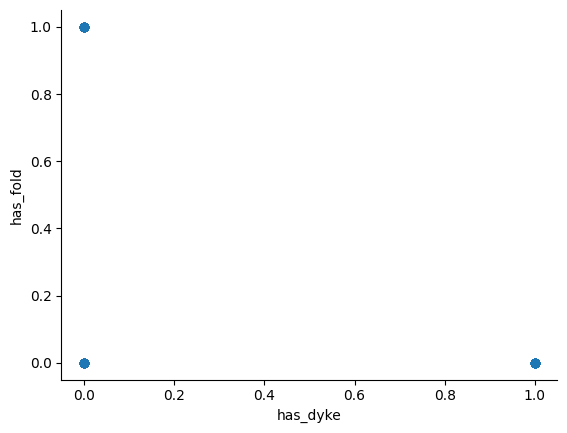

In [ ]:
# @title has_dyke vs has_fold

from matplotlib import pyplot as plt
final_grid.plot(kind='scatter', x='has_dyke', y='has_fold', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
import matplotlib.pyplot as plt

DATA VISUALIZATION


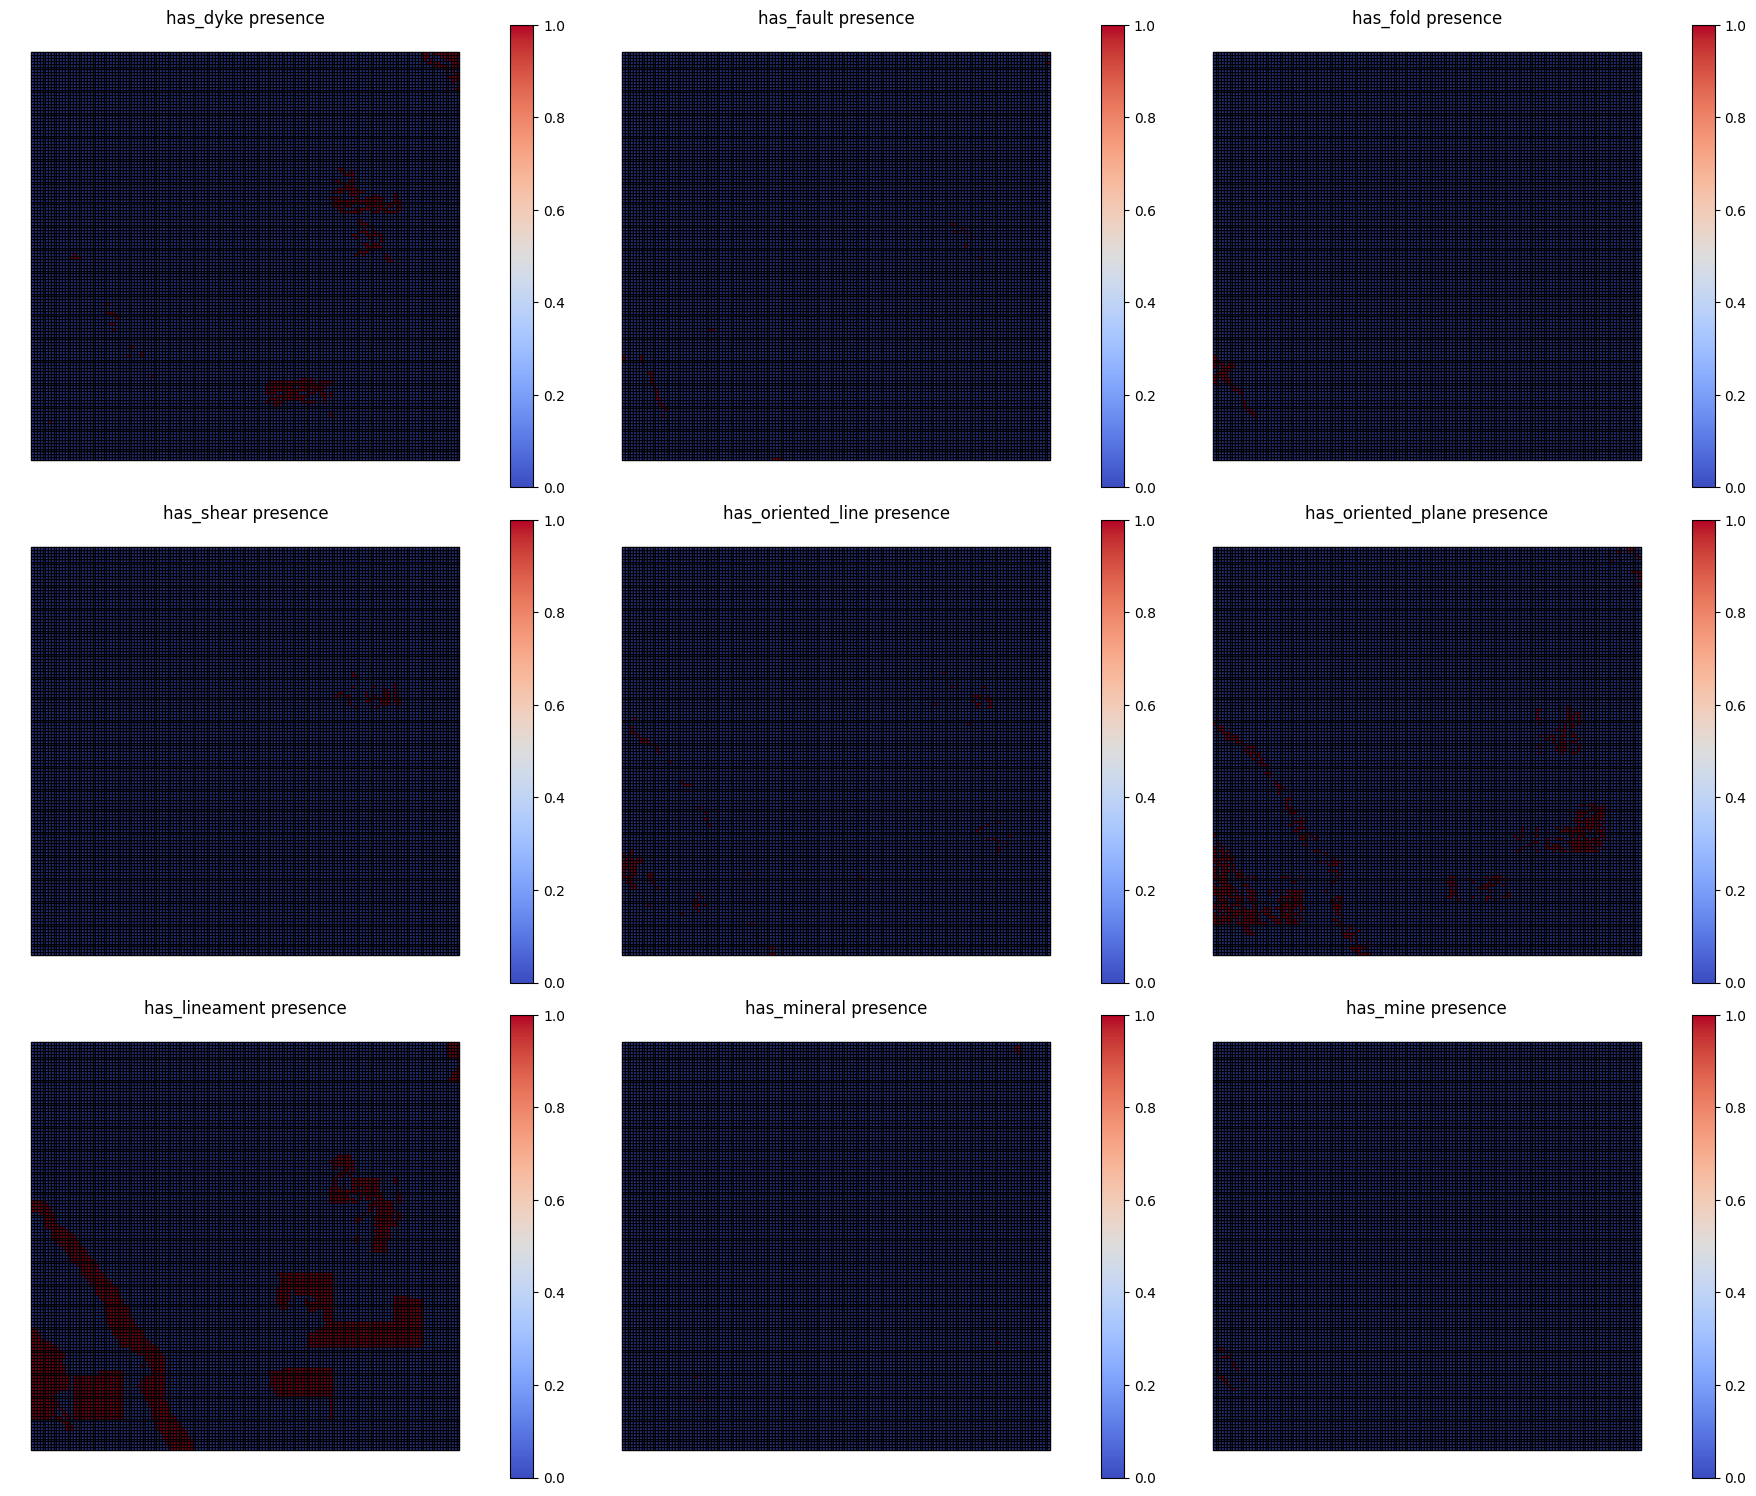

In [ ]:
features = ['has_dyke', 'has_fault', 'has_fold', 'has_shear',
            'has_oriented_line', 'has_oriented_plane', 'has_lineament',
            'has_mineral', 'has_mine']

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))
axs = axs.flatten()

for i, feature in enumerate(features):
    final_grid.plot(column=feature, ax=axs[i], legend=True, cmap='coolwarm', edgecolor='black')
    axs[i].set_title(f"{feature} presence")
    axs[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
final_grid.to_file("final_grid.geojson", driver="GeoJSON")

In [122]:
df = final_grid.drop(columns='geometry')

In [123]:
df = df.fillna(0)

MODEL BUILDING AND DATA FITTING


In [124]:
X = df.drop(columns='has_mineral')  # example target
y = df['has_mineral']

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [126]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [139]:

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

# Train and evaluate
for name, model in models.items():
    print(f"\n{name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))



Logistic Regression
Accuracy: 0.9998
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4373
           1       0.00      0.00      0.00         1

    accuracy                           1.00      4374
   macro avg       0.50      0.50      0.50      4374
weighted avg       1.00      1.00      1.00      4374

Confusion Matrix:
[[4373    0]
 [   1    0]]

Random Forest


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.9998
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4373
           1       0.00      0.00      0.00         1

    accuracy                           1.00      4374
   macro avg       0.50      0.50      0.50      4374
weighted avg       1.00      1.00      1.00      4374

Confusion Matrix:
[[4373    0]
 [   1    0]]

Support Vector Machine
Accuracy: 0.9998
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4373
           1       0.00      0.00      0.00         1

    accuracy                           1.00      4374
   macro avg       0.50      0.50      0.50      4374
weighted avg       1.00      1.00      1.00      4374

Confusion Matrix:
[[4373    0]
 [   1    0]]

K-Nearest Neighbors


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Accuracy: 0.9998
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4373
           1       0.00      0.00      0.00         1

    accuracy                           1.00      4374
   macro avg       0.50      0.50      0.50      4374
weighted avg       1.00      1.00      1.00      4374

Confusion Matrix:
[[4373    0]
 [   1    0]]

Decision Tree
Accuracy: 0.9998
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4373
           1       0.00      0.00      0.00         1

    accuracy                           1.00      4374
   macro avg       0.50      0.50      0.50      4374
weighted avg       1.00      1.00      1.00      4374

Confusion Matrix:
[[4373    0]
 [   1    0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

**K-Nearest Neighbors is  givng the highest accuracy of 99%**

****

Testing with PCA data with 5 machine learning models


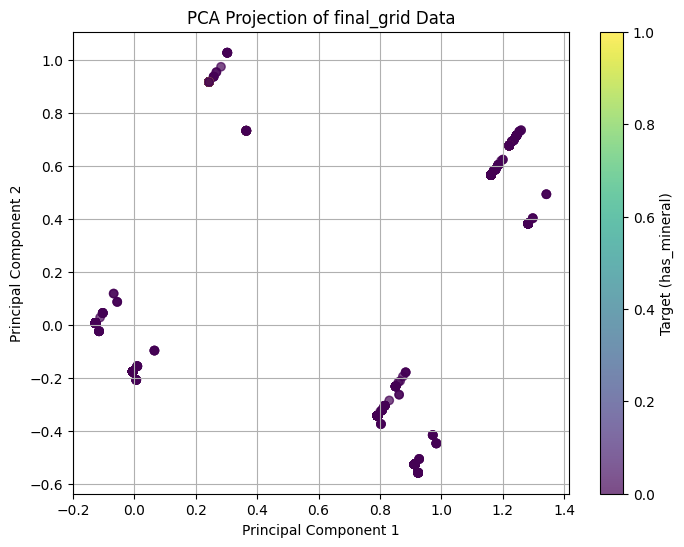

In [140]:
# Reduce to 2 principal components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualize
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.title('PCA Projection of final_grid Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Target (has_mineral)')
plt.grid(True)
plt.show()


In [129]:
pca = PCA(n_components=2)  # or any number of components
X_pca = pca.fit_transform(X)

# Show how much variance each component explains
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Variance Preserved:", sum(pca.explained_variance_ratio_))


Explained Variance Ratio: [0.66232269 0.15425646]
Total Variance Preserved: 0.8165791505094444


In [143]:
# PCA
pca = PCA(n_components=8)  # or choose based on explained variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train a model on PCA-reduced features
model = RandomForestClassifier()
model.fit(X_train_pca, y_train)
y_pred_pca = model.predict(X_test_pca)

# Evaluate
print("Classification Report after PCA:")
print(classification_report(y_test, y_pred_pca))


Classification Report after PCA:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4373
           1       0.00      0.00      0.00         1

    accuracy                           1.00      4374
   macro avg       0.50      0.50      0.50      4374
weighted avg       1.00      1.00      1.00      4374



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [142]:
# PCA
pca = PCA(n_components=8)  # or choose based on explained variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train a model on PCA-reduced features
model = KNeighborsClassifier()
model.fit(X_train_pca, y_train)
y_pred_pca = model.predict(X_test_pca)

# Evaluate
print("Classification Report after PCA:")
print(classification_report(y_test, y_pred_pca))

Classification Report after PCA:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4373
           1       0.00      0.00      0.00         1

    accuracy                           1.00      4374
   macro avg       0.50      0.50      0.50      4374
weighted avg       1.00      1.00      1.00      4374



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [136]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# PCA
pca = PCA(n_components=8)  # or choose based on explained variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train a model on PCA-reduced features
model = DecisionTreeClassifier()
model.fit(X_train_pca, y_train)
y_pred_pca = model.predict(X_test_pca)

# Evaluate
print("Classification Report after PCA:")
print(classification_report(y_test, y_pred_pca))

Classification Report after PCA:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4373
           1       0.00      0.00      0.00         1

    accuracy                           1.00      4374
   macro avg       0.50      0.50      0.50      4374
weighted avg       1.00      1.00      1.00      4374



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [141]:
# PCA
pca = PCA(n_components=8)  # or choose based on explained variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train a model on PCA-reduced features
model =  SVC()
model.fit(X_train_pca, y_train)
y_pred_pca = model.predict(X_test_pca)

# Evaluate
print("Classification Report after PCA:")
print(classification_report(y_test, y_pred_pca))

Classification Report after PCA:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4373
           1       0.00      0.00      0.00         1

    accuracy                           1.00      4374
   macro avg       0.50      0.50      0.50      4374
weighted avg       1.00      1.00      1.00      4374



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
